## Creación de dataframe en formato largo

In [3]:
import pandas as pd

In [24]:
edges = pd.DataFrame(
    {
        "source": ["Tía Jana", "Eijbaum", "Eijbaum", "Dvoira Krik", "Méndel Krik", "Fróim Grach","Fróim Grach",
                  "Fróim Grach", "Liovka", "Tartakovski", "Tartakovski", "Benia Krik", "Pesia", "Benia Krik", "Fróim Grach", 
                   "Fróim Grach", "Kaplún", "Kaplún", "Kaplún", "Fróim Grach", "Fróim Grach", "Benia Krik", "Benia Krik", "Liubka",
                  "Tsudechkis", "Tsudechkis"],
        "target": ["Benia Krik", "Benia Krik",  "Dvoira Krik", "Benia Krik", "Benia Krik", "Arie-Leib", "Benia Krik", 
                   "Méndel Krik", "Benia Krik", "Benia Krik", "Iósif", "Iósif", "Iósif", "Pesia", "Baska", "Iván", "Baska", 
                   "Monia", "Fróim Grach", "Golúbchik", "Liubka", "Liubka", "Katiúsha", "Evzel", "Evzel", "Liubka"]
    }
)

edges["weight"] = [1]*len(edges)

edges["Color"] = ["royalblue"]*5 + ["forestgreen"]*9 + ["darkorange"]*9 + ["slategrey"]*3

node_sizes = []

edges

,source,target,weight,Color
0,Tía Jana,Benia Krik,1,royalblue
1,Eijbaum,Benia Krik,1,royalblue
2,Eijbaum,Dvoira Krik,1,royalblue
3,Dvoira Krik,Benia Krik,1,royalblue
4,Méndel Krik,Benia Krik,1,royalblue
5,Fróim Grach,Arie-Leib,1,forestgreen
6,Fróim Grach,Benia Krik,1,forestgreen
7,Fróim Grach,Méndel Krik,1,forestgreen
8,Liovka,Benia Krik,1,forestgreen
9,Tartakovski,Benia Krik,1,forestgreen


## Creación de la red

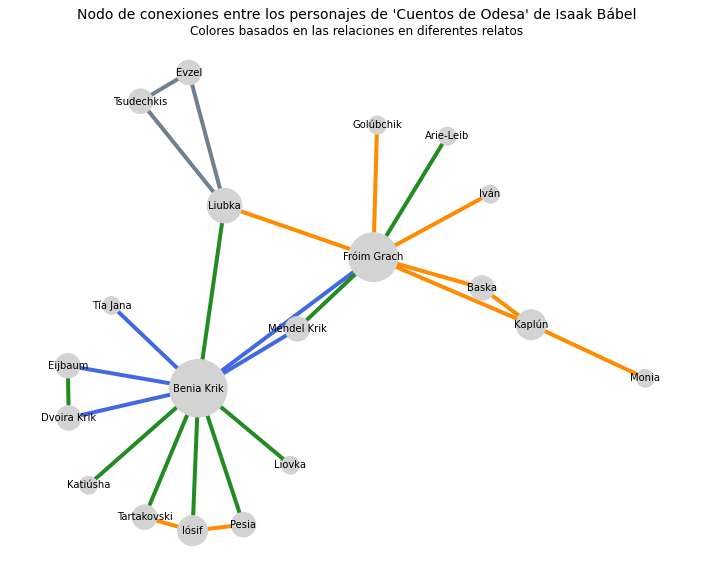

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Red
G = nx.from_pandas_edgelist(edges, source='source', target='target')

pos = nx.spring_layout(G, seed=23)  # posición de los nodos, la semilla es aleatoria

# labels
colors = list(edges.Color)

fig, ax = plt.subplots(figsize=(10, 8))

# nodes
node_sizes = [d * 300 for n, d in G.degree()]
nx.set_node_attributes(G, dict(zip(G.nodes(), node_sizes)), 'size')


nx.draw_networkx_nodes(G, pos, node_size=[v for k, v in nx.get_node_attributes(G, 'size').items()],
                       node_color="lightgrey")

# edges
nx.draw_networkx_edges(G, pos, width=4,edge_color=colors)  # using a 10x scale factor here
 
#else
nx.draw_networkx(G, pos, font_size=10, font_family="sans-serif", node_color="lightgrey", edge_color=colors, ax=ax)

ax.margins(0.05)
plt.axis("off")
plt.tight_layout()
plt.title("Nodo de conexiones entre los personajes de 'Cuentos de Odesa' de Isaak Bábel", fontsize=14)
plt.suptitle("Colores basados en las relaciones en diferentes relatos");